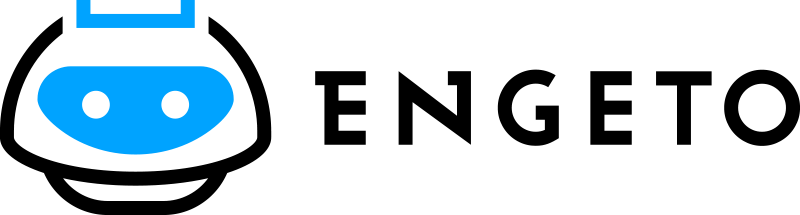

#Úvod

Komunikace s DBMS a obnova databáze ze zálohy.

Cvičení jsou zaměřená na agregační funkce (například `SUM()` a `MAX()`). 

Pomocí nich budeme schopni získat z celého souboru dat jednočíselné výsledky jako součty, průměry či maxima nebo minima. 

Také si představíme klauzuli `GROUP BY` pomocí níž budeme schopni datové záznamy rozdělovat do skupin podle námi určených charakteristik.

## Kde najdete materiály?

Na portalu engeta - https://learn.engeto.com/

#Komunikace s DBMS a obnova databáze ze zálohy

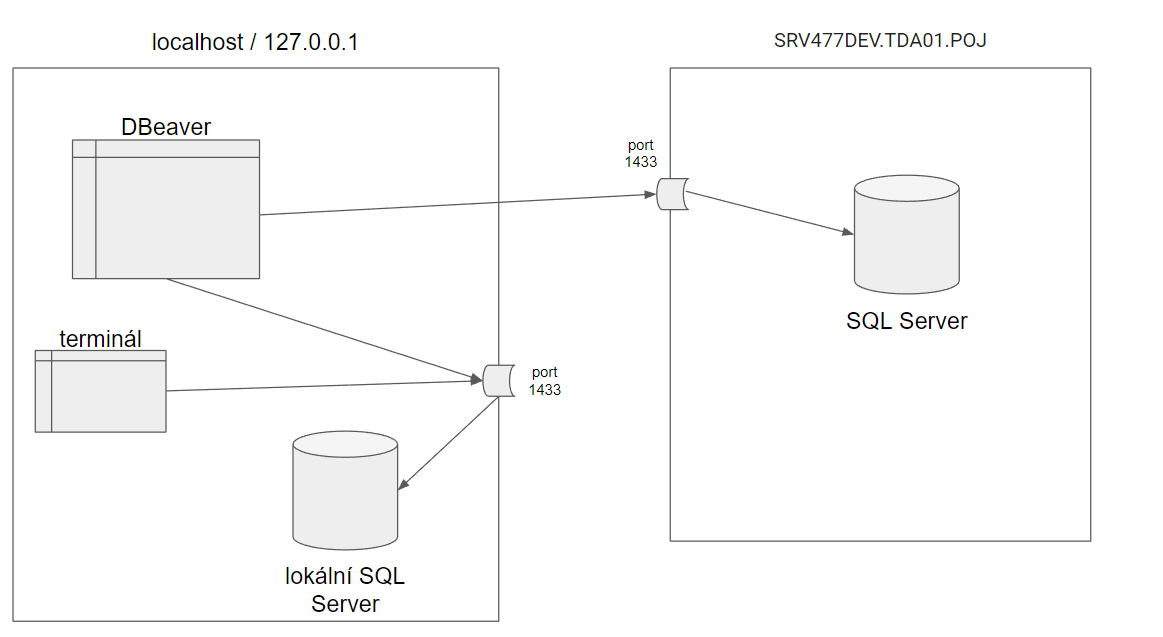

##Obnova ze zálohy

Databázi můžeme celou/častečně zálohovat (dump / backup).

Následně ji můžeme znovu obnovit (restore).

Můžeme provést prostřednictvím DBeaver nebo SQL Server Management Studio (SSMS).



##Údaje pro připojení

**server**: SRV477DEV.TDA01.POJ

**port**: 1433

**název databáze**: SKOLENI_DT

**schéma**: dbo

**uživatel**: zak_dt_**XX**

**heslo**: 🌝 --vase heslo-- 🌝

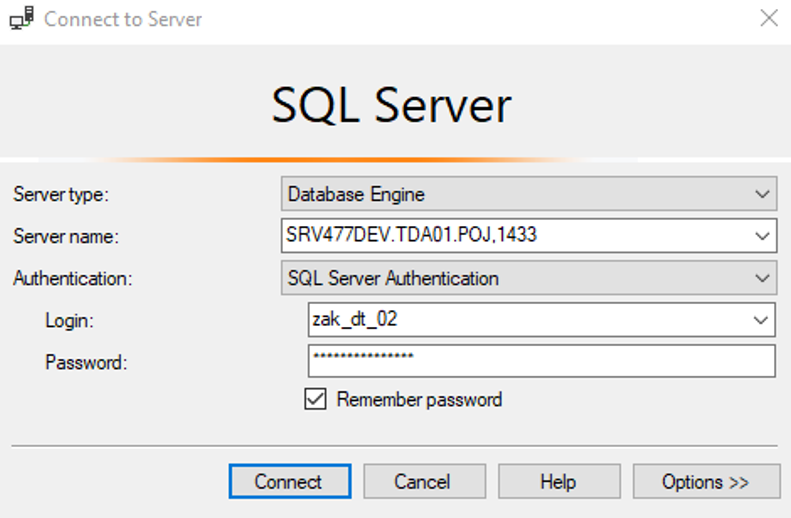

#Popis datových sad
Pro cvičení z SQL používáme data uložená v databázi. Data obsahují informace z několika oblastí. Nyní si popíšeme tabulky, se kterými budeme pracovat:

Číselníky sdílených informací o ČR:

* **czechia_region** – Číselník krajů České republiky dle normy CZ-NUTS 2.
* **czechia_district** – Číselník okresů České republiky dle normy LAU.

Datová sada poskytovatelů zdravotních služeb České republiky:

* **healthcare_provider** – Informace o poskytovatelích zdravotních služeb z listopadu roku 2021. Datová sada pochází z Portálu otevřených dat ČR.
* **healthcare_provider_legal_form** – Číselník právních forem poskytovatelů zdravotních služeb.
* **healthcare_provider_legal_typ** – Číselník typů osob poskytovatelů zdravotních služeb.

Datové sady pro porovnání příjmů a cen vybraných potravin:

* **czechia_payroll** – Informace o mzdách v různých odvětvích za několikaleté období. Datová sada pochází z Portálu otevřených dat ČR.
* **czechia_payroll_calculation** – Číselník kalkulací v tabulce mezd.
* **czechia_payroll_industry_branch** – Číselník odvětví v tabulce mezd.
* **czechia_payroll_unit** – Číselník jednotek hodnot v tabulce mezd.
* **czechia_payroll_value_type** – Číselník typů hodnot v tabulce mezd.
* **czechia_price** – Informace o cenách vybraných potravin za několikaleté období. Datová sada pochází z Portálu otevřených dat ČR.
* **czechia_price_category** – Číselník kategorií potravin, které se vyskytují v našem přehledu.

Dále máme data o zemích světa, ty jsou v následujících tabulkách:

* **countries** - všemožné informace o zemích na světě, například hlavní město, měna, národní jídlo nebo průměrná výška populace
* **demographics** - populace, porodnost, úmrtnost... pro daný stát a rok
* **economies** - HDP, gini, daňová zátěž... pro daný stát a rok
* **religions** - počty příslušníků světových náboženství v jednotlivých státech a letech
* **life_expectancy** - očekávaná délka života pro daný stát a rok


#Funkce COUNT()


##Úkol 1
Spočítejte počet řádků v tabulce `czechia_price`.



In [ ]:
SELECT 
    COUNT(1)
FROM czechia_price;

##Úkol 2
Spočítejte počet řádků v tabulce `czechia_payroll` s konkrétním sloupcem jako argumentem funkce COUNT().



In [ ]:
SELECT 
    COUNT(id) AS rows_count
FROM czechia_payroll;

vs. nesprávné řešení se sloupcem, který má v hodnotách NULL



In [ ]:
SELECT 
    COUNT(value) AS rows_count
FROM czechia_payroll;

##Úkol 3
Z kolika záznamů v tabulce `czechia_payroll` jsme schopni vyvodit průměrné počty zaměstnanců?



In [ ]:
SELECT
    COUNT(id) AS rows_of_known_employees
FROM czechia_payroll
WHERE   
    value_type_code = 316 AND 
    value IS NOT NULL;

##Úkol 4
Vypište všechny cenové kategorie a počet řádků každé z nich v tabulce `czechia_price`.



In [ ]:
SELECT
    category_code,
    COUNT(id) AS rows_in_category
FROM czechia_price
GROUP BY category_code;

`GROUP BY` klauzule se používá (ve spojení s agregačními funkcemi) pro seskupování dat podle určitých vlastností.

##Úkol 5
Rozšiřte předchozí dotaz o dadatečné rozdělení dle let měření.

In [ ]:
SELECT
    category_code, 
    YEAR(date_from) AS year_of_entry,
    COUNT(id) AS rows_in_category
FROM czechia_price
GROUP BY 
    category_code, 
    YEAR(date_from)
ORDER BY 
    YEAR(date_from), 
    category_code;

In [ ]:
SELECT FORMAT(GetDate(), 'yyyy-MM');

SELECT DATEPART(YEAR , CAST('2023-02-23 01:56:11' AS datetime));  
   
SELECT FORMAT(CAST('2023-02-23 01:56:11' AS datetime) , 'yyyy-MM-dd HH:mm');
   

In [ ]:
Dokumentace datetime hodnot a funkcí.

https://learn.microsoft.com/en-us/sql/t-sql/functions/date-and-time-data-types-and-functions-transact-sql?view=sql-server-ver16


#Funkce SUM()

##Úkol 1
Sečtěte všechny průměrné počty zaměstnanců v datové sadě průměrných platů v České republice.



In [ ]:
SELECT 
    SUM(value) AS value_sum
FROM czechia_payroll
WHERE value_type_code = 316;

##Úkol 2
Sečtěte průměrné ceny pro jednotlivé kategorie pouze v Jihomoravském kraji.



Výpis dat o krajích ČR:

In [ ]:
SELECT *
FROM czechia_region;


Finální dotaz:

In [ ]:
SELECT
    category_code,
    SUM(value) AS sum_of_average_prices
FROM czechia_price
WHERE region_code = 'CZ064'
GROUP BY category_code;

##Úkol 3
Sečtěte průměrné ceny potravin za všechny kategorie, u kterých měření probíhalo dne 15. 1. 2018 (date_from).

Implicitní přetypování:



In [ ]:
SELECT
    SUM(value) AS sum_of_average_prices
FROM czechia_price
WHERE date_from = '2018-01-15';



Explicitní přetypování:



In [ ]:
SELECT
    SUM(value) AS sum_of_average_prices
FROM czechia_price
WHERE date_from = CAST('2018-01-15' AS date);

##Úkol 4
Vypište tři sloupce z tabulky `czechia_price`: kód kategorie, počet řádků pro ni a sumu hodnot průměrných cen. 

To vše pouze pro data v roce 2018.

In [ ]:
SELECT
    category_code,
    COUNT(1) AS row_count,
    SUM(value) AS sum_of_average_prices
FROM czechia_price
WHERE YEAR(date_from) = 2018
GROUP BY category_code;



Proč je pro kapra jenom 15 řádků?

In [ ]:

SELECT * FROM czechia_price_category;

In [ ]:
SELECT DISTINCT MONTH(date_from)
FROM czechia_price
WHERE
    category_code = 2000001 
    AND YEAR(date_from) = 2018;

In [ ]:
SELECT DISTINCT MONTH(date_from)
FROM czechia_price
WHERE
    category_code = 111101 
    AND YEAR(date_from) = 2018;

#Další agregační funkce

##Úkol 1
Vypište maximální hodnotu průměrné mzdy z tabulky `czechia_payroll`.

Typy hodnot v tabulce datové sady:




In [ ]:
SELECT *
FROM czechia_payroll_value_type;

Finální dotaz:



In [ ]:
SELECT
    MAX(value)
FROM czechia_payroll
WHERE value_type_code = 5958;

##Úkol 2
Na základě údajů v tabulce `czechia_price` vyberte pro každou kategorii potravin její minimum v letech 2015 až 2017.

In [ ]:
SELECT
    category_code,
    MIN(value)
FROM czechia_price
WHERE YEAR(date_from) BETWEEN 2015 AND 2017
GROUP BY category_code;

##Úkol 3
Vypište kód (případně i název) odvětví s historicky nejvyšší průměrnou mzdou.

In [ ]:
SELECT
    industry_branch_code
FROM czechia_payroll
WHERE value IN (
    SELECT
        MAX(value)
    FROM czechia_payroll
    WHERE value_type_code = 5958
);

Získání i názvu odvětví:



In [ ]:
SELECT
    *
FROM czechia_payroll_industry_branch
WHERE code IN (
    SELECT
        industry_branch_code
    FROM czechia_payroll
    WHERE value IN (
        SELECT
            MAX(value)
        FROM czechia_payroll
        WHERE value_type_code = 5958
    )
);

##Úkol 4

Pro každou kategorii potravin určete její minimum, maximum a vytvořte nový sloupec s názvem difference, ve kterém budou hodnoty "`rozdíl do 10 Kč`", "`rozdíl do 40 Kč`" a "`rozdíl nad 40 Kč`" na základě rozdílu minima a maxima. 

Podle tohoto rozdílu data seřaďte.



In [ ]:
SELECT
    category_code,
    MIN(value),
    MAX(value),
    CASE
        WHEN MAX(value) - MIN(value) < 10 THEN 'rozdíl do 10 Kč'
        WHEN MAX(value) - MIN(value) < 40 THEN 'rozdíl do 40 Kč'
        ELSE 'rozdíl nad 40 Kč'
    END AS difference
FROM czechia_price
GROUP BY category_code
ORDER BY difference;


Korektnější řazení:



In [ ]:
SELECT
    category_code,
    MIN(value),
    MAX(value),
    CASE
        WHEN MAX(value) - MIN(value) < 10 THEN 'rozdíl do 10 Kč'
        WHEN MAX(value) - MIN(value) < 40 THEN 'rozdíl do 40 Kč'
        ELSE 'rozdíl nad 40 Kč'
    END AS difference
FROM czechia_price
GROUP BY category_code
ORDER BY MAX(value) - MIN(value);

##Úkol 5
Vyberte pro každou kategorii potravin minimum, maximum a aritmetický průměr (v našem případě průměr z průměrů) zaokrouhlený na dvě desetinná místa.

In [ ]:
SELECT
    category_code,
    MIN(value) AS historical_minimum,
    MAX(value) AS historical_maximum,
    ROUND(AVG(value), 2) AS average
FROM czechia_price
GROUP BY category_code;

##Úkol 6
Rozšiřte předchozí dotaz tak, že data budou rozdělena i podle kódu kraje a seřazena sestupně podle aritmetického průměru.



In [ ]:
SELECT
    category_code,
    region_code,
    MIN(value) AS historical_minimum,
    MAX(value) AS historical_maximum,
    ROUND(AVG(value), 2) AS average
FROM czechia_price
GROUP BY category_code, region_code
ORDER BY average DESC;

#Další operace v klauzuli SELECT

##Úkol 1
Vyzkoušejte si následující dotazy. Co vypisují a proč?

In [ ]:
SELECT SQRT(-16);
SELECT 10/0;
SELECT FLOOR(1.56);
SELECT FLOOR(-1.56);
SELECT CEILING(1.56);
SELECT CEILING(-1.56);
SELECT ROUND(1.56, 0);
SELECT ROUND(-1.56, 0);



In [ ]:
SELECT SQRT(-16); #error
SELECT 10/0; #error
SELECT FLOOR(1.56); #1
SELECT FLOOR(-1.56); #-2
SELECT CEILING(1.56); #2
SELECT CEILING(-1.56); #-1
SELECT ROUND(1.56, 0)); #2
SELECT ROUND(-1.56, 0); #-2

##Úkol 2
Vypočítejte průměrné ceny kategorií potravin bez použití funkce AVG() s přesností na dvě desetinná místa.

In [ ]:
SELECT
    category_code,
    ROUND(SUM(value) / COUNT(value), 2) AS average_price
FROM czechia_price
GROUP BY category_code
ORDER BY average_price;

##Úkol 3
Jaké datové typy budou mít hodnoty v následujících dotazech?

In [ ]:
SELECT 1;
SELECT 1.0;
SELECT 1 + 1;
SELECT 1 + 1.0;
SELECT 1 + '1';
SELECT 1 + 'a';
SELECT 1 + '12tatata';


In [ ]:
SELECT 1; #INT
SELECT 1.0; #NUMERIC
SELECT 1 + 1; #INT
SELECT 1 + 1.0; #NUMERIC
SELECT 1 + '1'; #INT fujky fujky
SELECT 1 + 'a'; #error
SELECT 1 + '12tatata'; #error

##Úkol 4

Vyzkoušejte si spustit dotazy, jež operují s textovými řetězci.

In [ ]:
SELECT CONCAT('Hi, ', 'Engeto lektor here!');

In [ ]:
SELECT CONCAT('We have ', COUNT(DISTINCT category_code), ' price categories.') AS info
FROM czechia_price;

FUNKCE SUBSTRING (expression, start, length)  

In [ ]:
# T-SQL
SELECT name,
    SUBSTRING(name, 1, 2) AS prefix,
    REVERSE(SUBSTRING(REVERSE(name), 1, 2)) AS suffix,
    LEN(name)         
FROM czechia_price_category;

In [ ]:
# SQL
SELECT name,
    SUBSTRING(name, 1, 2) AS prefix,
    SUBSTRING(name, -2, 2) AS suffix, 
    LEN(name)         
FROM czechia_price_category;

# UPOZORNĚNÍ

---



Při práci v DBeaveru ukončujte průběžně connections do dtb, která nepotřebujete.

Před ukončením DBeaveru rovněž ukončete všechna connections.

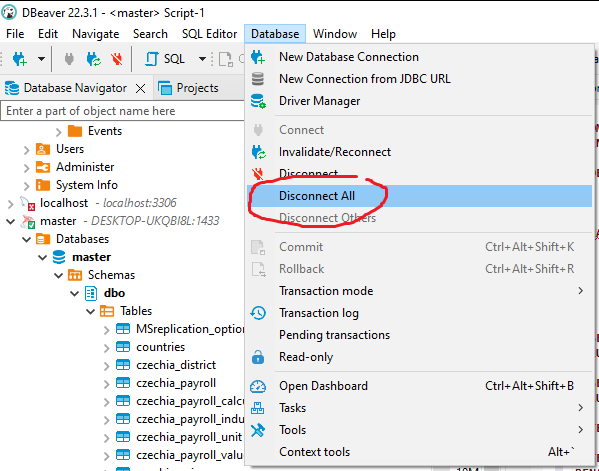

#Závěrem lekce

Díky agregačním funkcím jsme schopni efektivně počítat sumy, průměry, zjišťovat maxima/minima nebo získat počet řádků různých datových sad. 

Tyto operace jsou nad relačními databázemi velice efektivní a často je potřebujeme pří základním průzkumu libovoných dat nebo na vypsání souhrnných statistik.

V poslední části lekce jsme pak prošli užitečné operace v klauzuli SELECT.

Zbytek této lekce je zaměřen na procvičování těchto funkcí nad dalšími datovými sadami. 

V navazující lekci se podíváme na spojování tabulek a množinové operace.